## Importing libraries

In [10]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='red'>Question 1

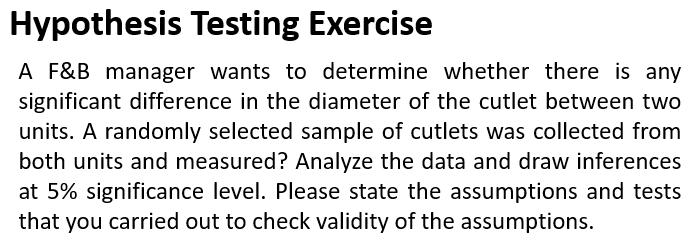

In [5]:
ImageGrab.grabclipboard()

## We are going to conduct a <font color='red'>2 tailed t-Test</font> on 2 Independent samples with Numerical Data

### We need to check whether the mean of both samples are different and
### Is there any significance difference between the two samples?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$
+ **Alternative Hypthosis:** $\mu_1 \neq \mu_2$

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

### As it is a two-tailed test
+ **alpha/2 = 0.025**

## <font color='red'>Step 3 
### Collect evidence

### Importing Files

In [5]:
cutlets = pd.read_csv('..\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Hypothesis testing 3\Cutlets.csv')
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


### Applying Descriptive Statistics

In [18]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


### Checking for Null Values

In [53]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

### Checking for Duplicate Values

In [55]:
cutlets[cutlets.duplicated()].shape

(0, 2)

In [56]:
cutlets[cutlets.duplicated()]

,Unit A,Unit B


### Checking the data type

In [41]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


### Plotting the data

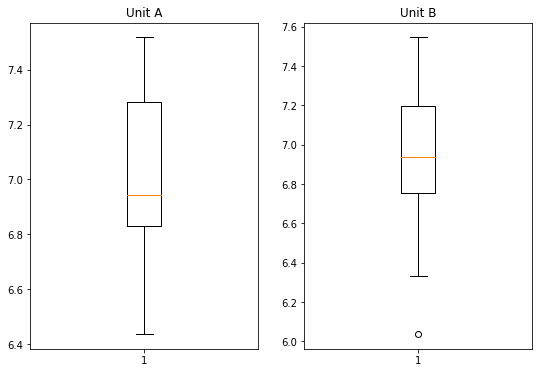

In [34]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

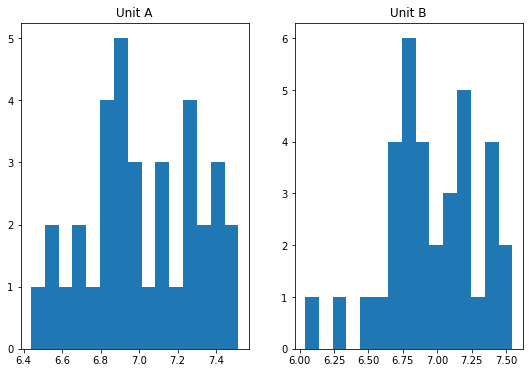

In [35]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.hist(cutlets['Unit A'], bins = 15)
plt.title('Unit A')
plt.subplot(122)
plt.hist(cutlets['Unit B'], bins = 15)
plt.title('Unit B')
plt.show()

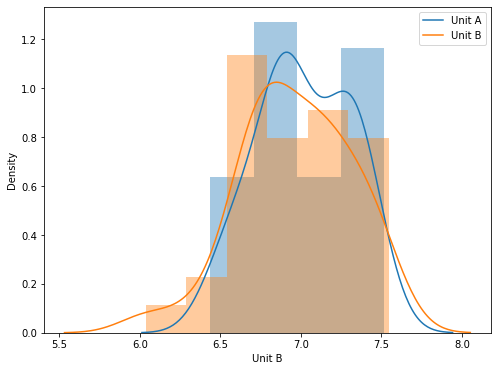

In [67]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'], kde = True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

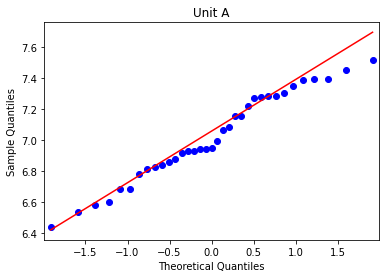

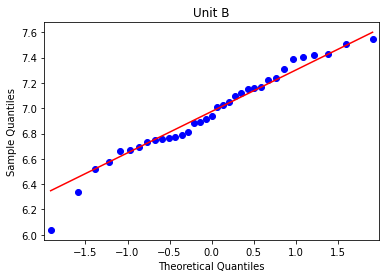

In [19]:
sm.qqplot(cutlets["Unit A"], line = 'q')
plt.title('Unit A')
sm.qqplot(cutlets["Unit B"], line = 'q')
plt.title('Unit B')
plt.show()

## <font color='red'>Step 4 

### Compare Evidences with Hypothesis using t-statistics

In [90]:
statistic , p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'], alternative = 'two-sided')
print('p_value=',p_value)

p_value= 0.4722394724599501


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [74]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


## Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

# <font color='red'>Question 2

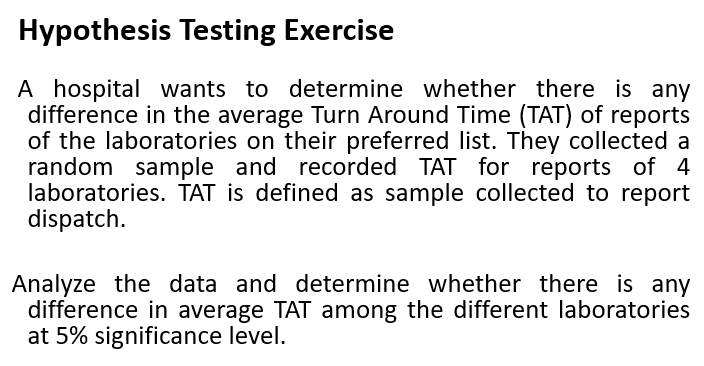

In [4]:
ImageGrab.grabclipboard()

## We are going to conduct a <font color='red'>ANOVA Test</font> on 4 Independent samples with Numerical Data

### We need to check whether the mean of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

### Importing Files

In [2]:
labtat = pd.read_csv('..\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Hypothesis testing 3\LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


### Applying Descriptive Statistics

In [77]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


### Checking for Null Values

In [78]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

### Checking for Duplicate Values

In [79]:
labtat[labtat.duplicated()].shape

(0, 4)

In [80]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


### Checking the data type

In [81]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


### Plotting the data

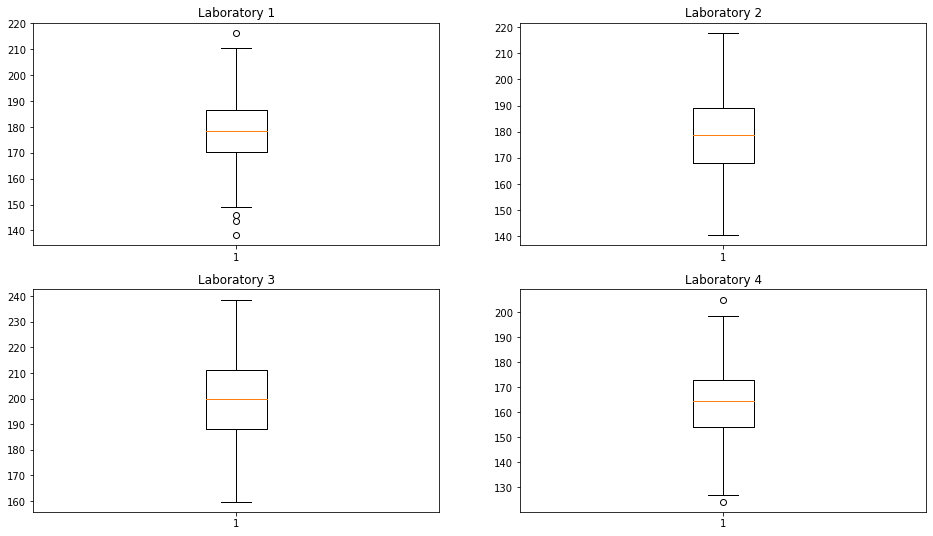

In [84]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

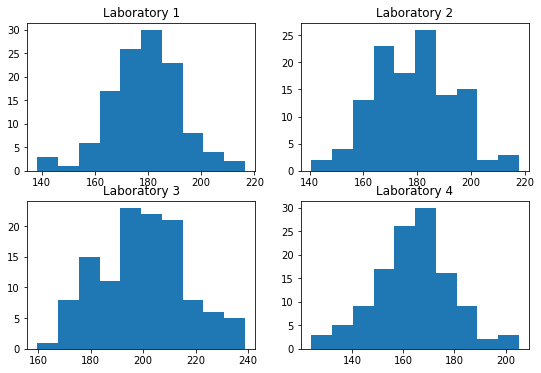

In [85]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

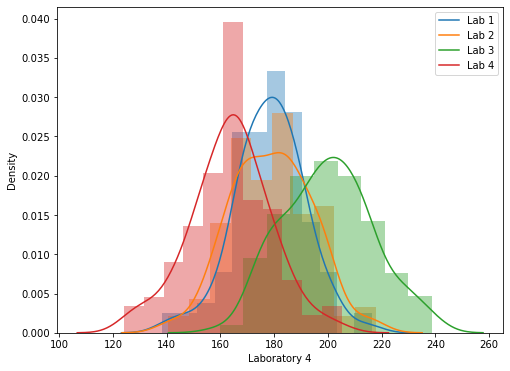

In [86]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

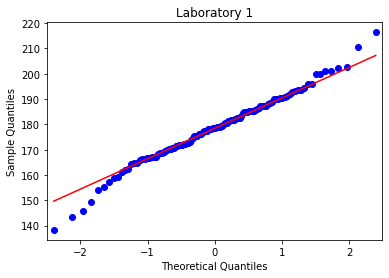

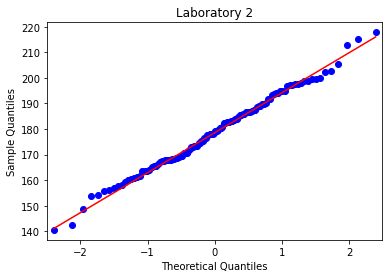

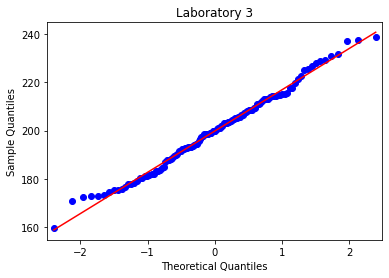

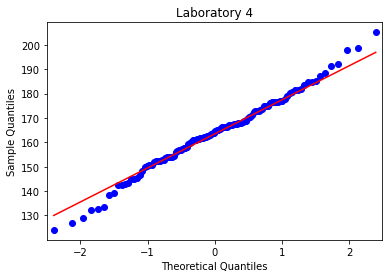

In [4]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [3]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [4]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


## Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

# <font color='red'>Question 3

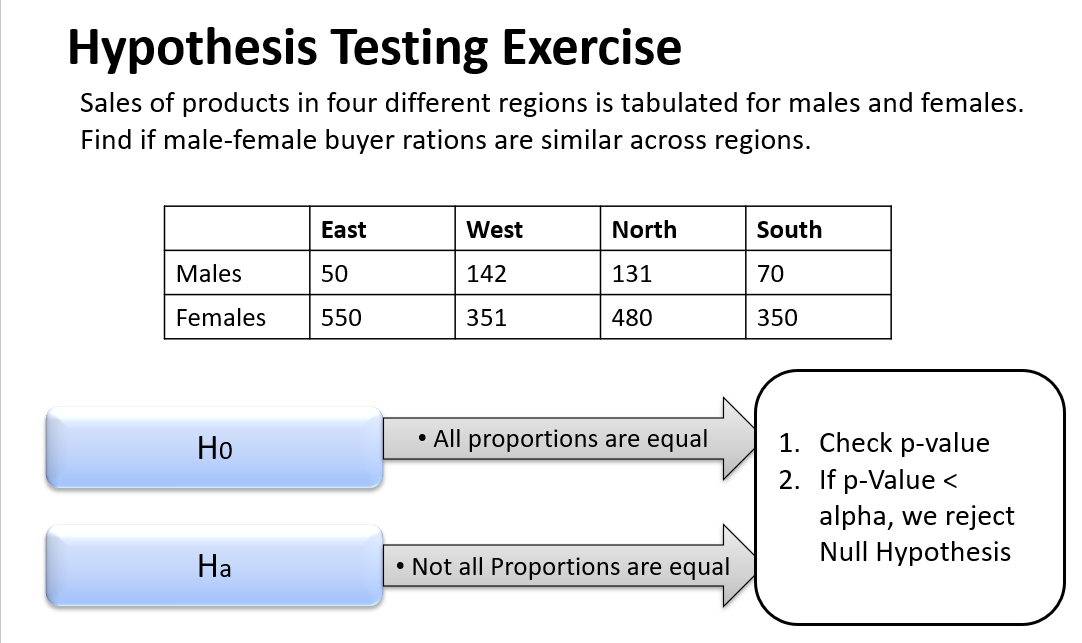

In [2]:
ImageGrab.grabclipboard()

## We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table

### We need to check whether the proportion of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** There is no association or dependency between the gender based buyer rations across regions
+ **Alternative Hypthosis:** There is a significant association or dependency between the gender based buyer rations across regions

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

### As it is a one-tailed test
+ **alpha = 1-0.95 = 0.05**

## <font color='red'>Step 3 
### Collect evidence

### Importing Files

In [21]:
buyer = pd.read_csv('..\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Hypothesis testing 3\BuyerRatio.csv', index_col = 0)
buyer

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [22]:
table = [[50,142,131,70],
        [435,1523,1356,750]]

### Applying Chi-Square $\chi_2$ contingency table to convert observed value into expected value

In [31]:
stat, p, dof, exp = stats.chi2_contingency(buyer) 
print(stat,"\n", p,"\n", dof,"\n", exp)

1.595945538661058 
 0.6603094907091882 
 3 
 [[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [24]:
stats.chi2_contingency(table) 

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [5]:
observed = np.array([50, 142, 131, 70, 435, 1523, 1356, 750])
expected = np.array([42.76531299,  146.81287862,  131.11756787, 72.30424052, 442.23468701, 1518.18712138, 1355.88243213, 747.69575948])

## <font color='red'>Step 4

### Comparing Evidence with Hypothesis

In [6]:
statistics, p_value = stats.chisquare(observed, expected, ddof = 3)
print("Statistics = ",statistics,"\n",'P_Value = ', p_value)

Statistics =  1.5959455390914483 
 P_Value =  0.8095206646905712


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [7]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack evidence. Therefore, there is no association or dependency between male-female buyers rations and are similar across regions. Hence, Independent samples

# <font color='red'>Question 4

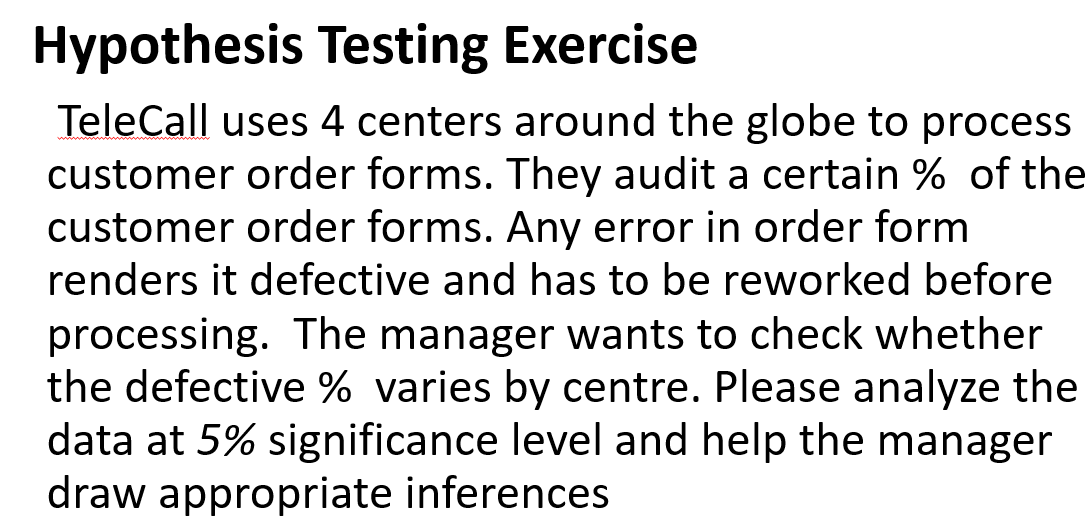

In [3]:
ImageGrab.grabclipboard()

## We are going to conduct a <font color="red">Test of Independence</font> using Chi-Square $\chi_2$ test with Contingency table

### We need to check whether the mean of any of these samples are different or the same?

##  <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

### Importing Files

In [62]:
centers = pd.read_csv('..\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Hypothesis testing 3\Customer_OrderForm.csv')
centers.head(10)

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
5,Error Free,Error Free,Error Free,Error Free
6,Error Free,Defective,Error Free,Error Free
7,Error Free,Error Free,Error Free,Error Free
8,Error Free,Error Free,Error Free,Error Free
9,Error Free,Error Free,Error Free,Error Free


### Applying Descriptive Statistics

In [34]:
centers.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


### Checking for Null Values

In [35]:
centers.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [45]:
centers[centers.isnull().any(axis=1)]

,Phillippines,Indonesia,Malta,India


### Checking the data type

In [37]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


### Checking value counts in data

In [86]:
print(centers['Phillippines'].value_counts(),'\n',centers['Indonesia'].value_counts(),'\n',centers['Malta'].value_counts(),'\n',centers['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


### Creating Contingency table

In [1]:
contingency_table = [[271,267,269,280],
                    [29,33,31,20]]
print(contingency_table)

[[271, 267, 269, 280], [29, 33, 31, 20]]


### Calculating Expected Values for Observed data

In [9]:
stat, p, df, exp = stats.chi2_contingency(contingency_table)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


### Defining Expected values and observed values

In [8]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [30]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


### Plotting the data

### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [9]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.810
We fail to reject Null hypothesis


## We fail to reject Null Hypothesis because of lack of evidence.